In [1]:
import pandas as pd
import numpy as np

In [2]:
prompt_file_paths = [
    '../dataset/nonredundant-civitai_prompts.tsv',
    '../dataset/nonredundant-midjourney_prompts-paired.tsv',
    '../dataset/nonredundant-leonardo_prompts.tsv',
]

In [3]:
prompts = list()

for file_path in prompt_file_paths:
    df = pd.read_csv(file_path, sep='\t')
    prompts.append(df)
    
prompts = pd.concat(prompts, axis=0, ignore_index=True)
prompts.dropna(inplace=True)

In [4]:
prompts.drop_duplicates(['positive_prompt', 'negative_prompt'], keep='first', inplace=True)

In [5]:
prompts['positive_length'] = prompts['positive_prompt'].str.len()
prompts['negative_length'] = prompts['negative_prompt'].str.len()

In [6]:
MAX_PROMPT_LENGTH = 500
MIN_PROMPT_LENGTH = 10

In [7]:
prompts.query(f'positive_length < {MAX_PROMPT_LENGTH} and negative_length < {MAX_PROMPT_LENGTH} and positive_length > {MIN_PROMPT_LENGTH} and negative_length > {MIN_PROMPT_LENGTH}', inplace=True)

In [8]:
prompts.query('positive_length / positive_raw_length > 0.5 and negative_length / negative_raw_length > 0.5', inplace=True)

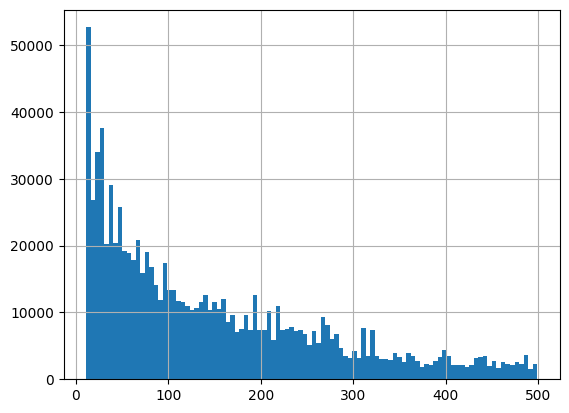

In [9]:
_ = prompts['negative_length'].hist(bins=100)

In [10]:
pos_len_to_count = {l: c for l, c in zip(*np.unique(prompts['positive_length'], return_counts=True))}
neg_len_to_count = {l: c for l, c in zip(*np.unique(prompts['negative_length'], return_counts=True))}

In [11]:
p = [min(1, max(40 / pos_len_to_count[pl], 40 / neg_len_to_count[nl])) for pl, nl in prompts[['positive_length', 'negative_length']].itertuples(index=False)]
p = np.array(p)
p = p / p.sum()

In [12]:
indices = np.random.choice(prompts.index, 20000, False, p)

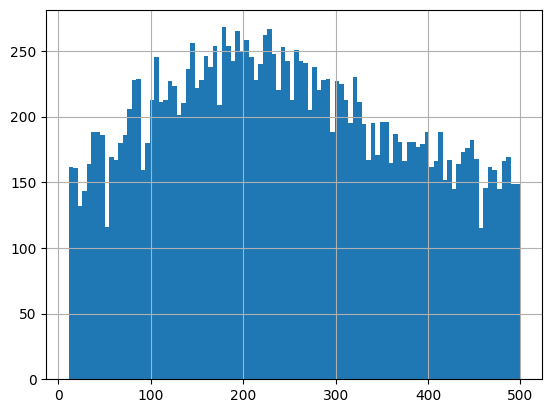

In [13]:
_ = prompts.loc[indices, 'positive_length'].hist(bins=100)

In [14]:
prompts.loc[indices, ['positive_prompt', 'negative_prompt']].to_csv('20000.tsv', sep='\t', index=False)